In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset
X = 2 * np.random.rand(100, 1)  # Generate 100 random samples from a uniform distribution between 0 and 2
# Create target variable 'y' based on a linear relationship with some added Gaussian noise
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3*X + noise

# Add bias term to the feature matrix
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to X for the intercept (bias) term


In [31]:
def compute_cost(theta, X_b, y):
    m = len(y)
    return (1 / (2 * m)) * np.sum(np.square(X_b.dot(theta) - y))

# Gradient Descent
def gradient_descent(X_b, y, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    theta = np.random.randn(2, 1)  # random initialization
    cost_history = []

    for iteration in range(n_iterations):
        gradients = (1 / m) * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(theta, X_b, y))

    return theta, cost_history # Return the learned parameters and cost history

# Run gradient descent to find optimal theta values and track cost history

theta_gd, cost_history_gd = gradient_descent(X_b, y)

In [26]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X_b, y, learning_rate=0.01, n_epochs=50):
    m = len(y)
    theta = np.random.randn(2, 1)  # random initialization
    cost_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
            
        cost_history.append(compute_cost(theta, X_b, y))

    return theta, cost_history

theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, y)

In [27]:
def mini_batch_gradient_descent(X_b, y, learning_rate=0.01, n_iterations=1000, batch_size=20):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization
    cost_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)  # Shuffle indices for mini-batch
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_mini_batch = X_b_shuffled[i:i + batch_size]
            y_mini_batch = y_shuffled[i:i + batch_size]
            gradients = (1 / batch_size) * X_mini_batch.T.dot(X_mini_batch.dot(theta) - y_mini_batch)
            theta -= learning_rate * gradients
            
        cost_history.append(compute_cost(theta, X_b, y))  # Store cost after each iteration

    return theta, cost_history

# Example usage (make sure to define X_b and y before running this)
theta_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X_b, y)


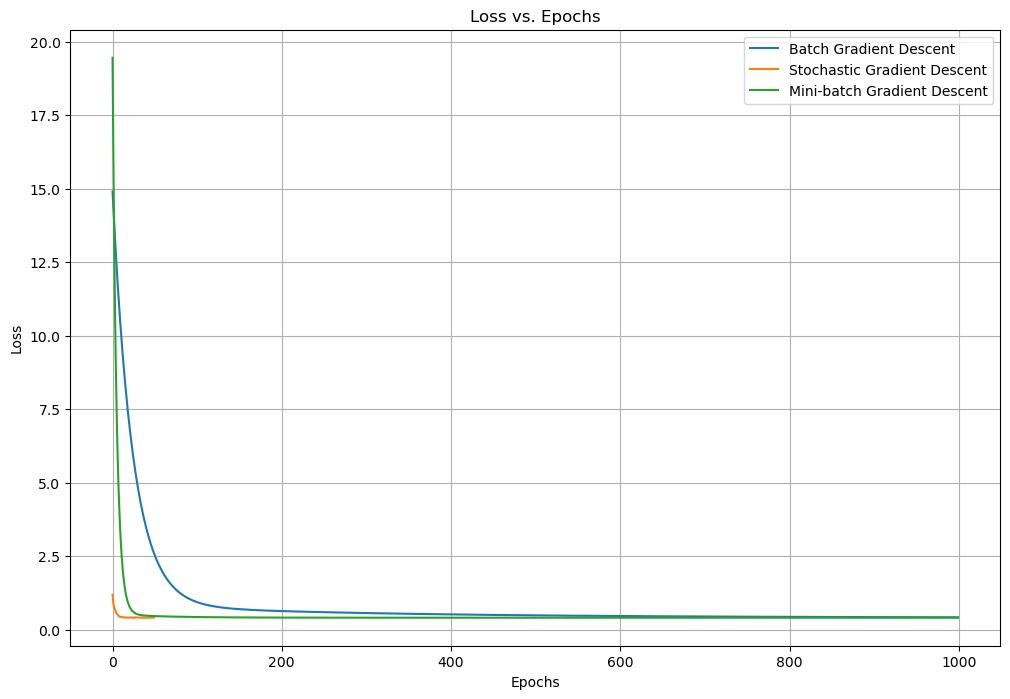

In [28]:
# Plotting Loss vs. Epochs
plt.figure(figsize=(12, 8))
plt.plot(cost_history_gd, label='Batch Gradient Descent')
plt.plot(cost_history_sgd, label='Stochastic Gradient Descent')
plt.plot(cost_history_mbgd, label='Mini-batch Gradient Descent')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


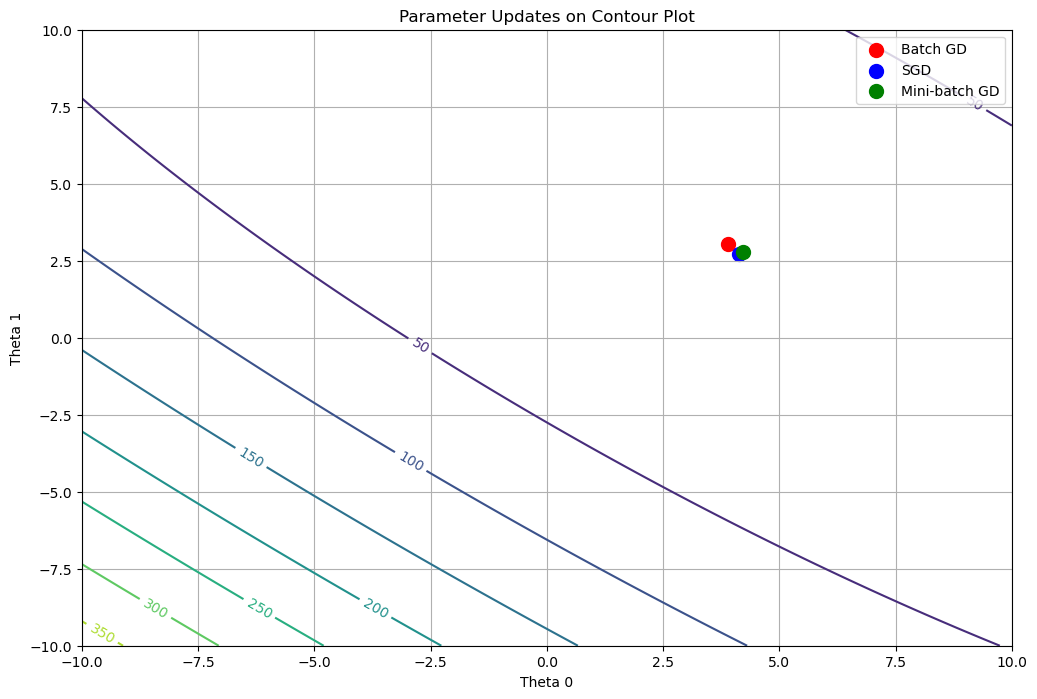

In [29]:
# Define a grid of values for theta_0 and theta_1
theta_0_range = np.linspace(-10, 10, 100)
theta_1_range = np.linspace(-10, 10, 100)
Theta_0, Theta_1 = np.meshgrid(theta_0_range, theta_1_range)

# Calculate loss values for contour plot
Z = np.zeros(Theta_0.shape)

for i in range(Theta_0.shape[0]):
    for j in range(Theta_0.shape[1]):
        theta = np.array([[Theta_0[i, j]], [Theta_1[i, j]]])  # Create a parameter vector
        Z[i,j] = compute_cost(theta,X_b,y)  # Compute the cost for each parameter pair

# Plotting the contour of the cost function
plt.figure(figsize=(12, 8))
contour = plt.contour(Theta_0, Theta_1, Z)
plt.clabel(contour)

# Plot parameter updates for each method
plt.scatter(theta_gd[0], theta_gd[1], color='red', s=100, label='Batch GD')
plt.scatter(theta_sgd[0], theta_sgd[1], color='blue', s=100, label='SGD')
plt.scatter(theta_mbgd[0], theta_mbgd[1], color='green', s=100,label='Mini-batch GD')

plt.title('Parameter Updates on Contour Plot')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.legend()
plt.grid(True)
plt.show()
